In [1]:
import pickle
import pandas as pd

In [3]:
hf_pytorch = pickle.load(open("pytorch_gpt2_benchmark.pkl", "rb"))
hf_tensorflow = pickle.load(open("tensorflow_gpt2_benchmark.pkl", "rb"))
tf_transformers_tensorflow = pickle.load(open("tf_transformers_gpt2_benchmark.pkl", "rb"))
tf_transformers_tensorflow_serialized = pickle.load(open("tf_transformers_gpt2_benchmark_serializable.pkl", "rb"))

# Greedy

In [4]:
# Columns
greedy_keys = hf_pytorch['greedy'].keys()

# results
greedy_results = []
greedy_results.append(list(hf_pytorch['greedy'].values()))
greedy_results.append(list(hf_tensorflow['greedy'].values()))
greedy_results.append(list(tf_transformers_tensorflow['greedy'].values()))
greedy_results.append(list(tf_transformers_tensorflow_serialized['greedy'].values()))

df_greedy = pd.DataFrame(greedy_results)

# columns and index
df_greedy.columns = greedy_keys
df_greedy.index   = ['hf_pytorch', 'hf_tensorflow', 'tf_transformers_tensorflow', 'tf_transformers_tensorflow_serialized']

In [5]:
# Highlight
df_greedy.style.highlight_min(color = 'lightgreen', axis = 0)


In [9]:
df_greedy.columns

MultiIndex([( 1,  15),
            ( 1,  25),
            ( 1,  50),
            ( 1, 100),
            ( 1, 150),
            ( 3,  15),
            ( 3,  25),
            ( 3,  50),
            ( 3, 100),
            ( 3, 150),
            ( 5,  15),
            ( 5,  25),
            ( 5,  50),
            ( 5, 100),
            ( 5, 150),
            (10,  15),
            (10,  25),
            (10,  50),
            (10, 100),
            (10, 150)],
           )

In [15]:
df_greedy.sample(n = 10, axis='columns')

5          10        1   \
                                             150        100       25    
hf_pytorch                              3.213499   2.115246  0.504843   
hf_tensorflow                          14.830588  10.133005  2.433300   
tf_transformers_tensorflow              2.204405   1.783661  0.325775   
tf_transformers_tensorflow_serialized   2.248568   1.619732  0.331374   

                                             10        5         1         3   \
                                            50        15        100       25    
hf_pytorch                             1.077085  0.322014  1.961173  0.529158   
hf_tensorflow                          5.094264  1.470358  9.773384  2.480403   
tf_transformers_tensorflow             0.847649  0.243073  1.292928  0.323663   
tf_transformers_tensorflow_serialized  0.863787  0.233120  1.361419  0.320551   

                                                        5         3   
                                             150       50        50   
hf_pytorch                              3.190150  1.017522  1.054712  
hf_tensorflow                          14.762385  5.009169  4.890523  
tf_transformers_tensorflow              2.050810  0.793228  0.637474  
tf_transformers_tensorflow_serialized   1.966312  0.739177  0.656346

# Find the count of index based on speed


In [59]:
df_greedy.idxmin(axis=0).value_counts()

tf_transformers_tensorflow_serialized    12
tf_transformers_tensorflow                8
dtype: int64

# Greedy Visualize

Text(0, 0.5, 'Time in Seconds')

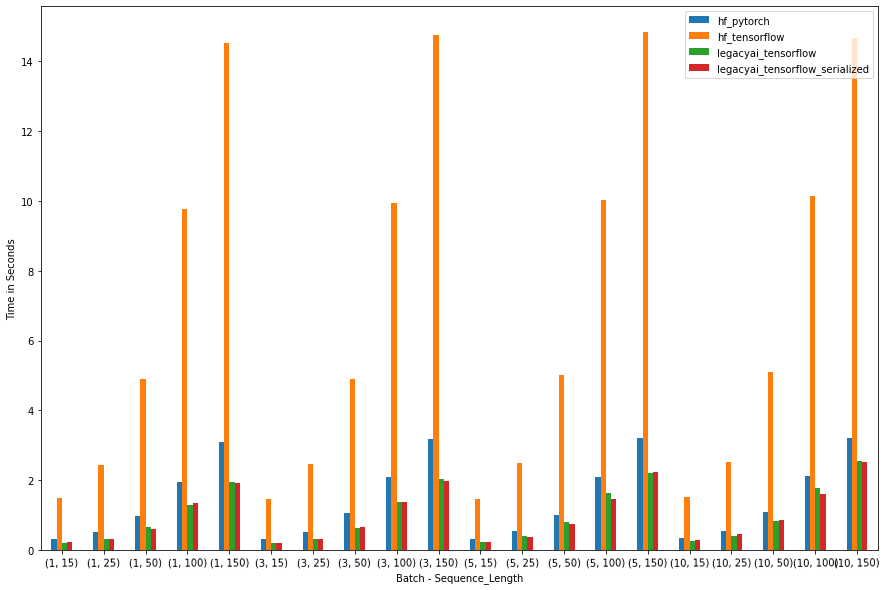

In [45]:
ax = df_greedy.transpose().plot.bar(rot=1, figsize=(15,10))
ax.set_xlabel("Batch - Sequence_Length")
ax.set_ylabel("Time in Seconds")

# Beam

In [16]:
beam_keys = list(hf_pytorch['beam'].keys())

# results
beam_results = []
beam_results.append(list(hf_pytorch['beam'].values()))
beam_results.append(list(hf_tensorflow['beam'].values()))
beam_results.append(list(tf_transformers_tensorflow['beam'].values()))

df_beam = pd.DataFrame(beam_results)

# columns and index
df_beam.columns = beam_keys
df_beam.index   = ['hf_pytorch', 'hf_tensorflow', 'tf_transformers_tensorflow']

In [17]:
# Highlight
df_beam.style.highlight_min(color='lightgreen', axis=0)

,"(1, 15, 1)","(1, 15, 2)","(1, 15, 5)","(1, 15, 7)","(1, 15, 10)","(1, 25, 1)","(1, 25, 2)","(1, 25, 5)","(1, 25, 7)","(1, 25, 10)","(1, 50, 1)","(1, 50, 2)","(1, 50, 5)","(1, 50, 7)","(1, 50, 10)","(1, 100, 1)","(1, 100, 2)","(1, 100, 5)","(1, 100, 7)","(1, 100, 10)","(1, 150, 1)","(1, 150, 2)","(1, 150, 5)","(1, 150, 7)","(1, 150, 10)","(3, 15, 1)","(3, 15, 2)","(3, 15, 5)","(3, 15, 7)","(3, 15, 10)","(3, 25, 1)","(3, 25, 2)","(3, 25, 5)","(3, 25, 7)","(3, 25, 10)","(3, 50, 1)","(3, 50, 2)","(3, 50, 5)","(3, 50, 7)","(3, 50, 10)","(3, 100, 1)","(3, 100, 2)","(3, 100, 5)","(3, 100, 7)","(3, 100, 10)","(3, 150, 1)","(3, 150, 2)","(3, 150, 5)","(3, 150, 7)","(3, 150, 10)","(5, 15, 1)","(5, 15, 2)","(5, 15, 5)","(5, 15, 7)","(5, 15, 10)","(5, 25, 1)","(5, 25, 2)","(5, 25, 5)","(5, 25, 7)","(5, 25, 10)","(5, 50, 1)","(5, 50, 2)","(5, 50, 5)","(5, 50, 7)","(5, 50, 10)","(5, 100, 1)","(5, 100, 2)","(5, 100, 5)","(5, 100, 7)","(5, 100, 10)","(5, 150, 1)","(5, 150, 2)","(5, 150, 5)","(5, 150, 7)","(5, 150, 10)","(10, 15, 1)","(10, 15, 2)","(10, 15, 5)","(10, 15, 7)","(10, 15, 10)","(10, 25, 1)","(10, 25, 2)","(10, 25, 5)","(10, 25, 7)","(10, 25, 10)","(10, 50, 1)","(10, 50, 2)","(10, 50, 5)","(10, 50, 7)","(10, 50, 10)","(10, 100, 1)","(10, 100, 2)","(10, 100, 5)","(10, 100, 7)","(10, 100, 10)","(10, 150, 1)","(10, 150, 2)","(10, 150, 5)","(10, 150, 7)","(10, 150, 10)"
hf_pytorch,0.255272,0.269642,0.299256,0.305957,0.327183,0.408796,0.437123,0.481300,0.498104,0.577172,0.778864,0.874259,0.938435,0.951680,1.017142,1.503326,1.739721,1.837005,1.921407,2.038744,2.425958,2.592315,2.845596,2.959757,3.133084,0.249364,0.272356,0.323290,0.378411,0.441931,0.418338,0.464399,0.546202,0.618810,0.691372,0.810039,0.878195,1.068220,1.132784,1.286692,1.625496,1.924049,2.090172,2.303166,2.607659,2.413921,2.703522,3.092900,3.476097,3.853386,0.253421,0.303952,0.392769,0.473590,0.569466,0.428280,0.499173,0.621341,0.687993,0.856449,0.779370,0.944444,1.169999,1.408176,1.584867,1.598596,1.890320,2.317565,2.700158,3.163931,2.439195,2.913815,3.490801,3.992600,4.680371,0.252831,0.367708,0.546279,0.654573,0.816702,0.410528,0.565008,0.820446,0.986245,1.212948,0.787216,1.095282,1.532898,1.817141,2.196497,1.509368,2.191924,2.966651,3.517594,4.219884,3.133333,4.115590,5.513420,6.452008,7.730218
hf_tensorflow,1.411740,1.444624,1.470635,1.602029,1.617618,2.409947,2.485838,2.599717,2.564045,2.611556,4.912509,4.955457,5.146413,4.993637,5.253520,9.708535,9.999027,9.979444,10.168391,10.465590,14.585843,14.616609,15.364933,15.305652,16.070360,1.496106,1.527686,1.738858,1.742642,1.851986,2.494207,2.615469,2.781952,2.902722,3.102645,4.977374,5.088930,5.720013,5.905632,6.126535,9.744700,10.174809,10.955795,11.313738,12.095915,14.755493,15.105612,16.607551,17.264097,18.242612,1.497242,1.659644,1.879331,1.932697,2.157441,2.430962,2.591655,3.012356,3.243013,3.428038,5.071414,5.605482,6.063465,6.435188,7.236931,9.982252,10.912710,11.907980,12.665159,13.956833,15.090093,16.199544,18.161590,19.296652,21.186009,1.459049,1.825304,2.240781,2.484889,3.002987,2.450075,3.077606,3.556311,4.071526,4.862524,4.959974,5.966055,7.418475,8.084375,9.181225,10.020167,12.306494,14.450036,16.038171,18.547830,15.290324,18.040575,21.749260,23.825658,27.853008
tf_transformers_tensorflow,0.232224,0.214620,0.224180,0.245039,0.267208,0.327697,0.340455,0.362428,0.423816,0.420994,0.757620,0.711283,0.793096,0.817148,0.810321,1.352022,1.367653,1.503772,1.583340,1.566262,2.022835,2.179992,2.230353,2.259612,2.464820,0.227835,0.208721,0.282935,0.339382,0.393132,0.374885,0.358863,0.439804,0.519887,0.625042,0.749125,0.734164,0.851490,0.966390,1.108462,1.326485,1.480803,1.725047,1.953668,2.256006,2.221161,2.430405,2.838885,2.848149,3.506601,0.210294,0.254436,0.351083,0.436779,0.552258,0.390668,0.384892,0.562516,0.660839,0.842543,0.748402,0.863030,1.009506,1.183627,1.450750,1.449038,1.522886,1.991396,2.396409,2.826850,2.110201,2.368876,2.991649,3.518615,4.308398,0.280699,0.333314,0.559345,0.682353,0.972615,0.37963

In [19]:
df_beam.sample(n = 10, axis='columns')

,"(3, 15, 2)","(5, 50, 5)","(5, 150, 5)","(1, 25, 2)","(3, 100, 10)","(3, 50, 5)","(3, 15, 1)","(5, 150, 10)","(5, 50, 7)","(10, 25, 10)"
hf_pytorch,0.272356,1.169999,3.490801,0.437123,2.607659,1.068220,0.249364,4.680371,1.408176,1.212948
hf_tensorflow,1.527686,6.063465,18.161590,2.485838,12.095915,5.720013,1.496106,21.186009,6.435188,4.862524
tf_transformers_tensorflow,0.208721,1.009506,2.991649,0.340455,2.256006,0.851490,0.227835,4.308398,1.183627,1.374123


# Find the count of index based on speed


In [60]:
df_beam.idxmin(axis=0).value_counts()

tf_transformers_tensorflow    89
hf_pytorch             11
dtype: int64

# Beam Visualize

Text(0, 0.5, 'Time in Seconds')

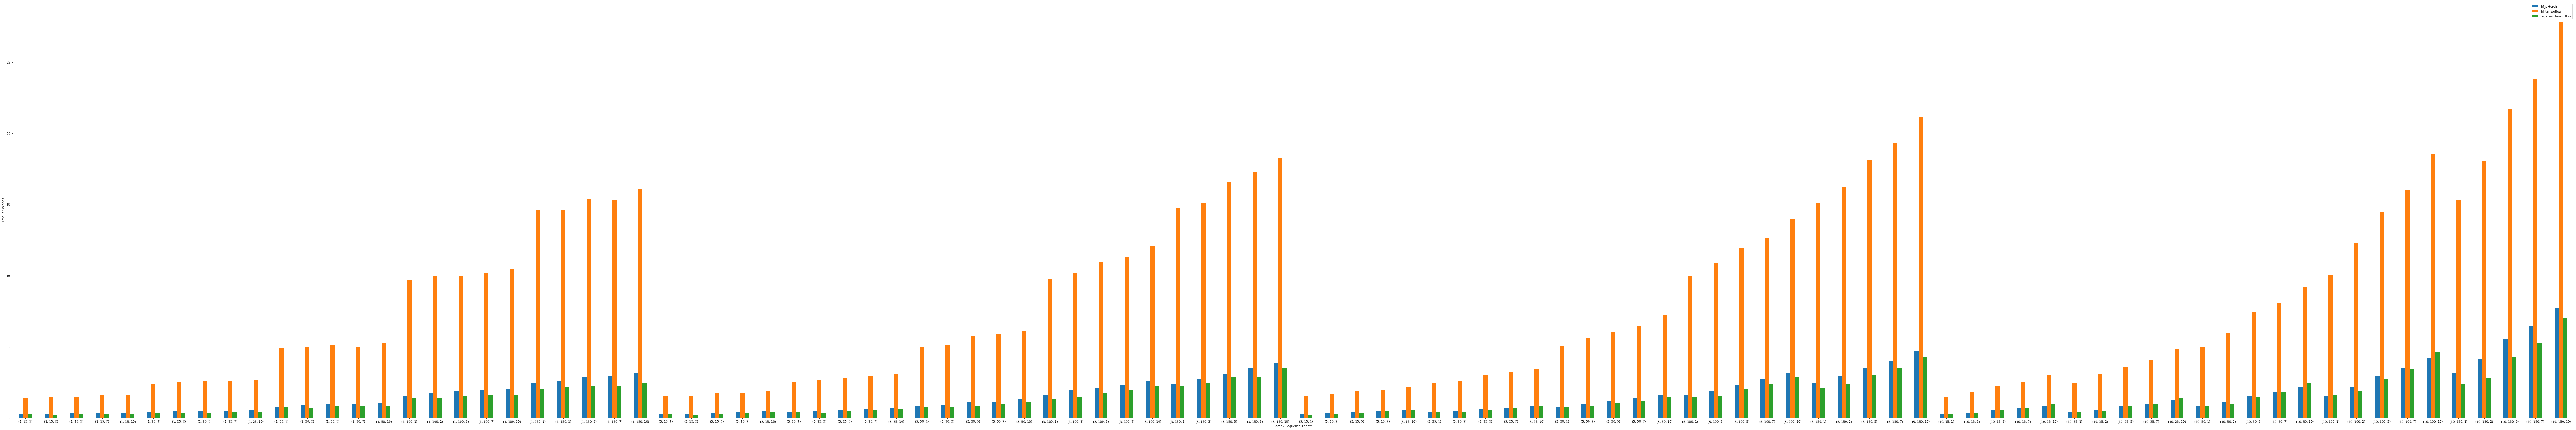

In [51]:
ax = df_beam.transpose().plot.bar(rot=1, figsize=(150,25))
ax.set_xlabel("Batch - Sequence_Length - BeamSize")
ax.set_ylabel("Time in Seconds")

# top K top P

In [20]:
top_k_top_p_keys = list(hf_pytorch['top_k_top_p'].keys())

# results
top_k_top_p_results = []
top_k_top_p_results.append(list(hf_pytorch['top_k_top_p'].values()))
top_k_top_p_results.append(list(hf_tensorflow['top_k_top_p'].values()))
top_k_top_p_results.append(list(tf_transformers_tensorflow['top_k_top_p'].values()))

df_top_k_top_p = pd.DataFrame(top_k_top_p_results)

# columns and index
df_top_k_top_p.columns = top_k_top_p_keys
df_top_k_top_p.index   = ['hf_pytorch', 'hf_tensorflow', 'tf_transformers_tensorflow']

In [22]:
# Highlight
df_top_k_top_p.style.highlight_min(color='lightgreen', axis=0)

,"(1, 15, 1)","(1, 15, 2)","(1, 15, 5)","(1, 15, 7)","(1, 15, 10)","(1, 25, 1)","(1, 25, 2)","(1, 25, 5)","(1, 25, 7)","(1, 25, 10)","(1, 50, 1)","(1, 50, 2)","(1, 50, 5)","(1, 50, 7)","(1, 50, 10)","(1, 100, 1)","(1, 100, 2)","(1, 100, 5)","(1, 100, 7)","(1, 100, 10)","(1, 150, 1)","(1, 150, 2)","(1, 150, 5)","(1, 150, 7)","(1, 150, 10)","(3, 15, 1)","(3, 15, 2)","(3, 15, 5)","(3, 15, 7)","(3, 15, 10)","(3, 25, 1)","(3, 25, 2)","(3, 25, 5)","(3, 25, 7)","(3, 25, 10)","(3, 50, 1)","(3, 50, 2)","(3, 50, 5)","(3, 50, 7)","(3, 50, 10)","(3, 100, 1)","(3, 100, 2)","(3, 100, 5)","(3, 100, 7)","(3, 100, 10)","(3, 150, 1)","(3, 150, 2)","(3, 150, 5)","(3, 150, 7)","(3, 150, 10)","(5, 15, 1)","(5, 15, 2)","(5, 15, 5)","(5, 15, 7)","(5, 15, 10)","(5, 25, 1)","(5, 25, 2)","(5, 25, 5)","(5, 25, 7)","(5, 25, 10)","(5, 50, 1)","(5, 50, 2)","(5, 50, 5)","(5, 50, 7)","(5, 50, 10)","(5, 100, 1)","(5, 100, 2)","(5, 100, 5)","(5, 100, 7)","(5, 100, 10)","(5, 150, 1)","(5, 150, 2)","(5, 150, 5)","(5, 150, 7)","(5, 150, 10)","(10, 15, 1)","(10, 15, 2)","(10, 15, 5)","(10, 15, 7)","(10, 15, 10)","(10, 25, 1)","(10, 25, 2)","(10, 25, 5)","(10, 25, 7)","(10, 25, 10)","(10, 50, 1)","(10, 50, 2)","(10, 50, 5)","(10, 50, 7)","(10, 50, 10)","(10, 100, 1)","(10, 100, 2)","(10, 100, 5)","(10, 100, 7)","(10, 100, 10)","(10, 150, 1)","(10, 150, 2)","(10, 150, 5)","(10, 150, 7)","(10, 150, 10)"
hf_pytorch,0.296147,0.285876,0.305055,0.293394,0.293391,0.464130,0.481762,0.487916,0.482910,0.501088,0.937050,0.913697,0.919081,0.944879,0.990655,1.858054,1.841729,1.825602,1.937631,1.973013,2.773457,2.864352,2.846777,2.838247,2.905004,0.281544,0.288313,0.324774,0.352086,0.383177,0.475169,0.475975,0.524979,0.573526,0.599904,0.898982,0.947698,1.007446,1.105808,1.161372,1.852578,1.902509,1.954741,2.116428,2.268385,2.864327,2.812053,3.002854,3.162042,3.319167,0.283139,0.295532,0.357788,0.405703,0.459956,0.475965,0.484808,0.582083,0.637145,0.693293,0.936953,0.959354,1.119574,1.181838,1.280208,1.904862,1.976083,2.223372,2.271844,2.473753,2.926475,2.979647,3.443737,3.539618,3.746657,0.311388,0.357257,0.472387,0.541103,0.652879,0.510796,0.579648,0.718614,0.802090,0.944896,0.990088,1.096758,1.307997,1.449592,1.645149,2.066825,2.223422,2.557200,2.743839,3.030571,2.937976,3.249699,3.779525,4.096809,4.534333
hf_tensorflow,1.536371,1.564230,1.706481,1.743768,1.855973,2.636313,2.719113,2.776713,2.908231,3.165659,5.240513,5.188519,5.520644,5.857405,6.144727,10.290925,10.558052,11.194704,11.909056,12.263259,15.582062,15.903876,16.770927,17.374403,18.330999,1.578132,1.767418,1.977271,2.284481,2.534368,2.719626,2.900931,3.376139,3.618079,4.222983,5.407717,5.873260,6.596165,7.357994,8.174548,10.802173,11.355105,13.451197,14.747740,16.428029,16.107226,17.152151,19.794820,22.020571,24.817310,1.682790,1.847387,2.268622,2.618541,3.076842,2.996259,3.031854,3.805189,4.275355,5.829167,5.520445,6.212808,7.679153,8.787737,10.108439,11.107092,12.560265,15.220444,17.163943,20.546633,16.812376,18.434001,23.132429,26.040224,30.488498,1.934830,2.140586,3.064094,3.625983,4.791033,3.033361,3.598389,5.184718,6.119203,7.749508,6.127055,7.304015,10.284880,12.278992,15.577461,12.178265,14.425063,20.154697,24.445638,30.285065,18.319426,21.683156,30.356186,36.682808,45.633502
tf_transformers_tensorflow,0.224738,0.234894,0.217771,0.230891,0.255860,0.335130,0.352096,0.383951,0.362891,0.403541,0.734714,0.653561,0.720263,0.716318,0.827417,1.390357,1.402382,1.432901,1.609769,1.576932,2.074417,2.134530,2.207266,2.221208,2.331017,0.204575,0.246637,0.323412,0.353589,0.412036,0.344846,0.384744,0.457205,0.518395,0.632661,0.702376,0.707272,0.861598,0.966671,1.127895,1.405133,1.438259,1.769292,2.008403,2.241414,2.231728,2.180102,2.576240,2.961210,3.233162,0.230844,0.252434,0.412727,0.467224,0.542746,0.477560,0.397838,0.586848,0.664656,0.822008,0.773310,0.799184,1.078417,1.255618,1.499583,1.437313,1.622988,2.071381,2.290050,2.866037,2.105398,2.375222,3.085314,3.535225,4.269005,0.250932,0.317535,0.560672,0.720087,1.00567

# Find the count of index based on speed


In [61]:
df_top_k_top_p.idxmin(axis=0).value_counts()

tf_transformers_tensorflow    70
hf_pytorch             30
dtype: int64

In [25]:
df_top_k_top_p.sample(n = 10, axis='columns')

,"(10, 50, 1)","(3, 25, 2)","(10, 15, 5)","(1, 150, 10)","(5, 150, 7)","(5, 25, 5)","(10, 100, 10)","(5, 15, 7)","(5, 100, 1)","(3, 25, 5)"
hf_pytorch,0.990088,0.475975,0.472387,2.905004,3.539618,0.582083,3.030571,0.405703,1.904862,0.524979
hf_tensorflow,6.127055,2.900931,3.064094,18.330999,26.040224,3.805189,30.285065,2.618541,11.107092,3.376139
tf_transformers_tensorflow,0.822601,0.384744,0.560672,2.331017,3.535225,0.586848,4.716680,0.467224,1.437313,0.457205


# top K top P Visualize

Text(0, 0.5, 'Time in Seconds')

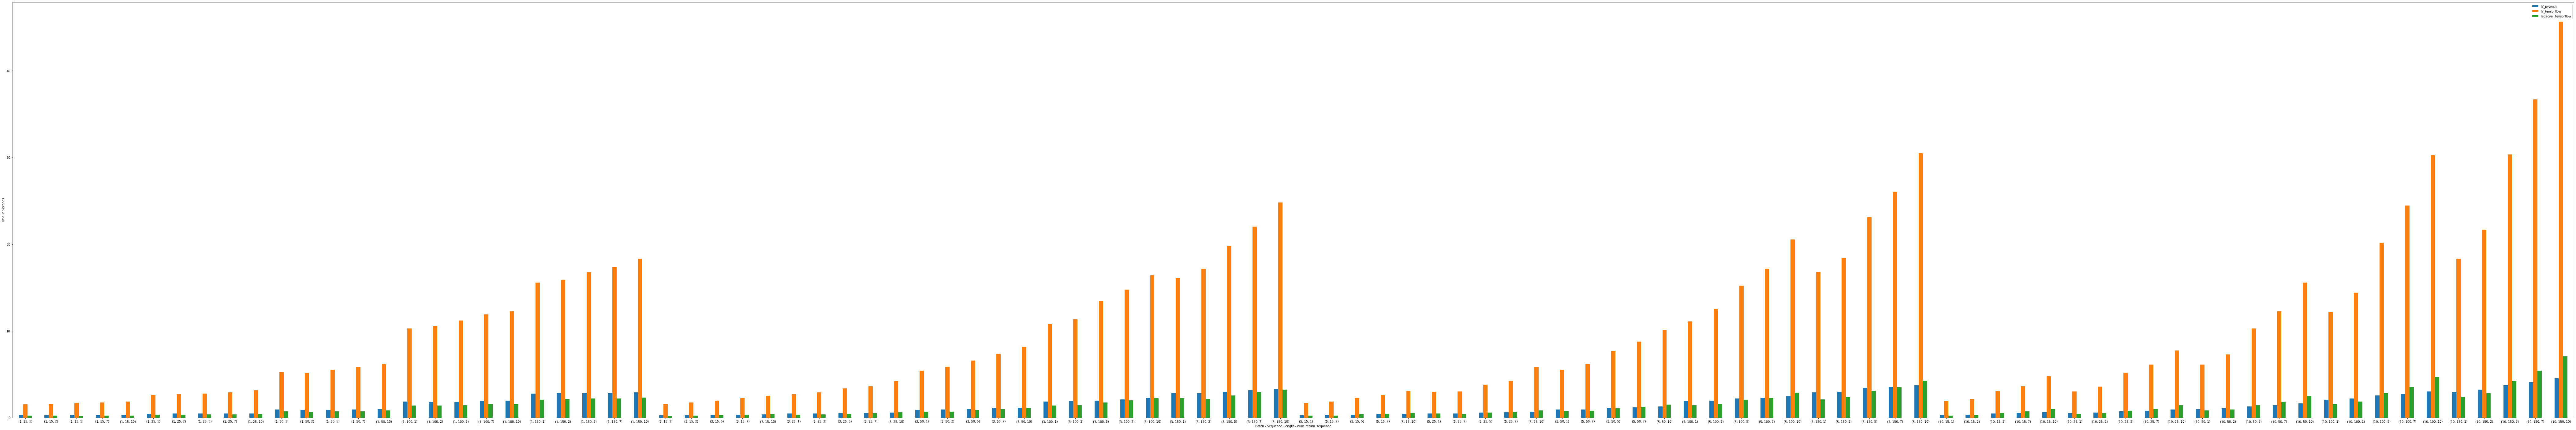

In [64]:
ax = df_top_k_top_p.transpose().plot.bar(rot=1, figsize=(150,25))
ax.set_xlabel("Batch - Sequence_Length - num_return_sequence")
ax.set_ylabel("Time in Seconds")